In [2]:
# importing libraries
import seaborn as sns
import pandas as pd


In [3]:
# importing tips dataset from seaborn library
tips = sns.load_dataset('tips')
# change 2

tips dataset is one of the example datasets built into the seaborn package and is used in the documentation of the seaborn package and can be easily loaded using the seaborn load_dataset command
see the following link "https://www.angela1c.com/projects/tips-project-files/part1/"

In [4]:
# see what is the data presented in the dataset
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# investigate the presented data.

In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [8]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

# how many dinners and lunches presented in the dataset?
#### Using  .value_counts method gives more details about data (integers).

In [9]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

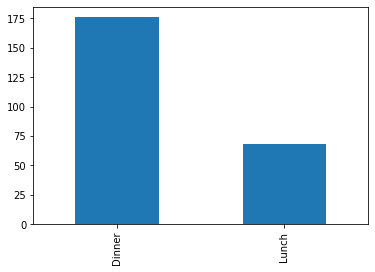

In [10]:
tips.time.value_counts().plot(kind ='bar')

# what is the portion of dinners and lunches in %

In [11]:
tips.time.value_counts(normalize=True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

<AxesSubplot:ylabel='time'>

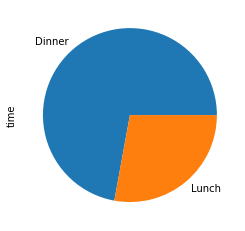

In [12]:
tips.time.value_counts().plot(kind ='pie')

# when does people pay more tips i.e. during dinner or lunch

In [13]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

# lests show this data in a bar chart

<AxesSubplot:xlabel='time'>

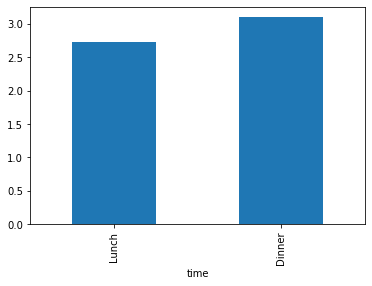

In [14]:
tips.groupby(['time'])['tip'].mean().plot.bar()

# similarly we can find the average tip for
### 1- sex
### 2- smoker / non smoker
### 3- day
### 4- size

In [15]:
tips.sex.value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

<AxesSubplot:>

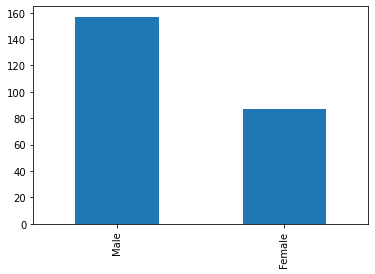

In [16]:
tips.sex.value_counts().plot(kind ='bar')

In [17]:
tips.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

<AxesSubplot:xlabel='sex'>

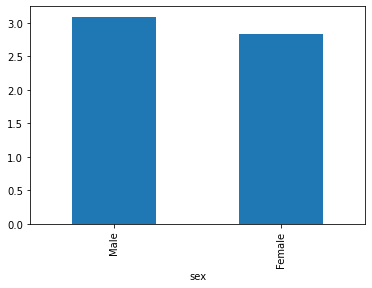

In [18]:
tips.groupby(['sex'])['tip'].mean().plot.bar()

# for smokers / non smokers

In [19]:
tips.smoker.value_counts(normalize=True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

<AxesSubplot:>

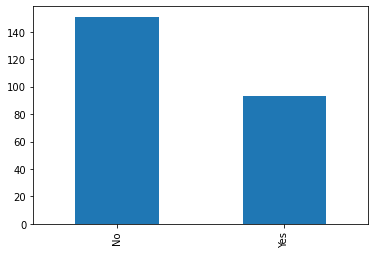

In [20]:
tips.smoker.value_counts().plot(kind ='bar')

In [21]:
tips.groupby(['smoker'])['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

<AxesSubplot:xlabel='smoker'>

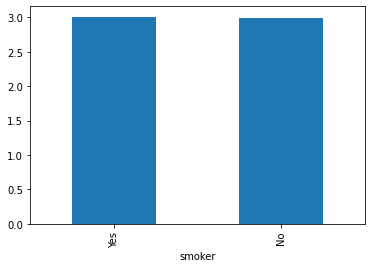

In [22]:
tips.groupby(['smoker'])['tip'].mean().plot.bar()

# for weekdays

In [23]:
tips.day.value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

<AxesSubplot:>

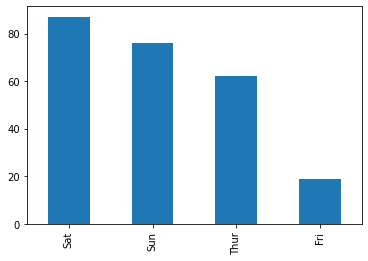

In [24]:
tips.day.value_counts().plot(kind ='bar')

In [25]:
tips.groupby(['day'])['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

<AxesSubplot:xlabel='day'>

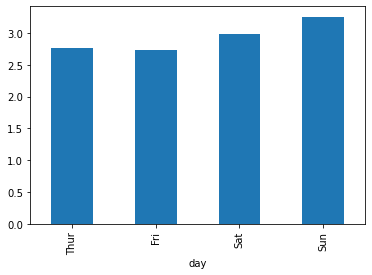

In [26]:
tips.groupby(['day'])['tip'].mean().plot.bar()

# creating a cross table for smoker and sex for average tips

In [29]:
tips.groupby(['smoker','sex'])['tip'].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

# putting this info in a pivot structure

In [30]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


<AxesSubplot:xlabel='sex'>

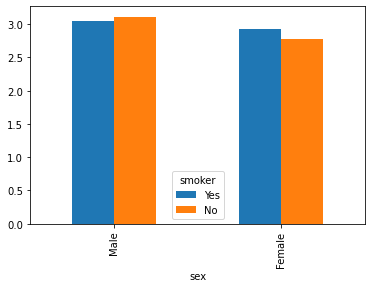

In [31]:
tips.groupby(['sex','smoker'])['tip'].mean().unstack().plot.bar()

# similarly we can create cross tabls for all other variables

In [32]:
tips.groupby(['day','sex'])['tip'].mean().unstack()

sex,Male,Female
day,,
Thur,2.980333,2.575625
Fri,2.693000,2.781111
Sat,3.083898,2.801786
Sun,3.220345,3.367222


<AxesSubplot:xlabel='day,sex'>

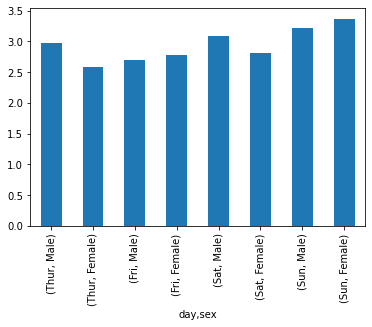

In [33]:
tips.groupby(['day','sex'])['tip'].mean().plot.bar()

In [34]:
tips.groupby(['smoker','day'])['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,3.030000,2.7140,2.875476,3.516842
No,2.673778,2.8125,3.102889,3.167895


<AxesSubplot:xlabel='day,smoker'>

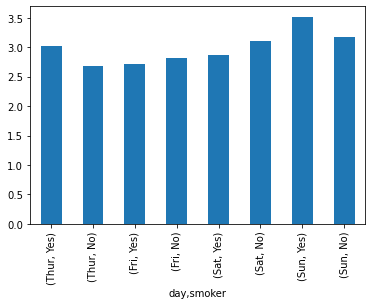

In [35]:
tips.groupby(['day','smoker'])['tip'].mean().plot.bar()

# Now let's create a new column with with the % of tip compared with total bill

In [36]:
tips['tip_pct'] = tips.tip / tips.total_bill

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

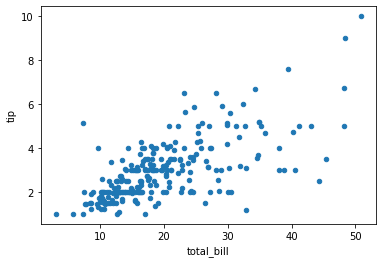

In [38]:
tips.plot.scatter(x='total_bill', y='tip')

# visualizing using seaborn library

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

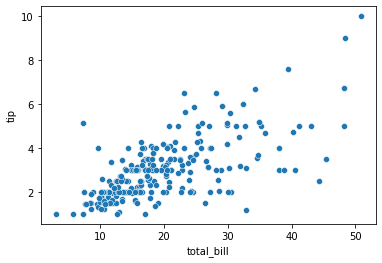

In [39]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

# diffrentiating data by sex

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

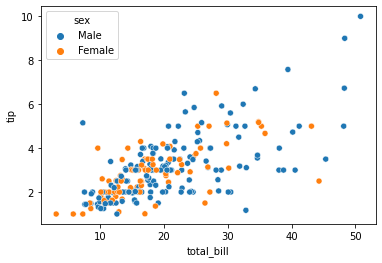

In [40]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='sex')

# similarly let's vesualize by time

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

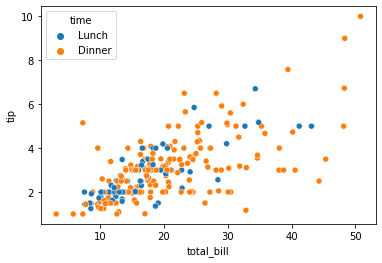

In [41]:
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='time')

# Creating two separated charts based on sex

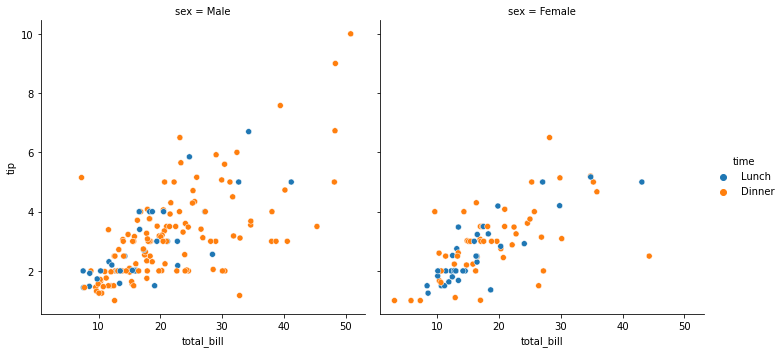

In [43]:
sns.relplot(x='total_bill',y='tip',data=tips,col='sex', hue='time')

# the distribution of total bill by time

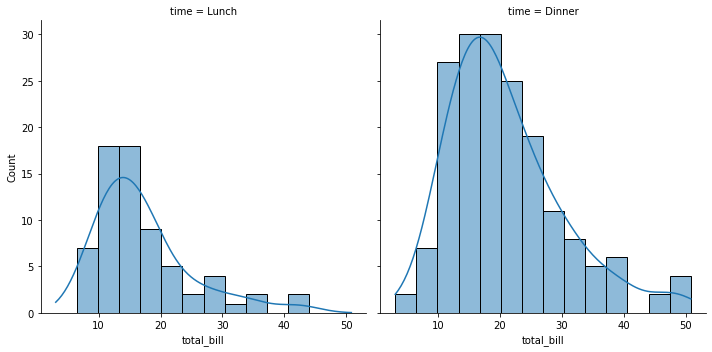

In [45]:
sns.displot(data=tips , x='total_bill', col='time', kde=True)

###### clearly people are paying more during dinners 

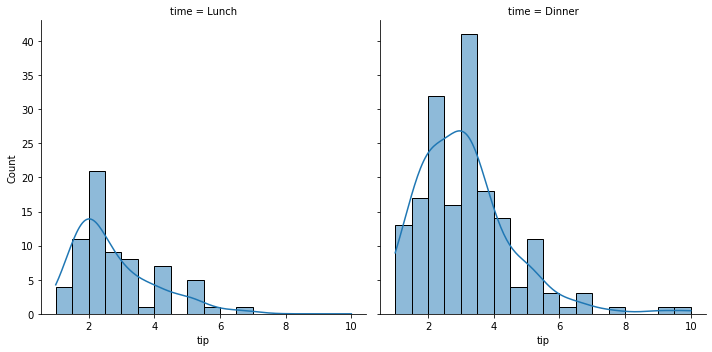

In [46]:
sns.displot(data=tips , x='tip', col='time', kde=True)

##### we can see people are paying larger tips in dinners

# creating correlation and distribution for all of the numeric variables by sex

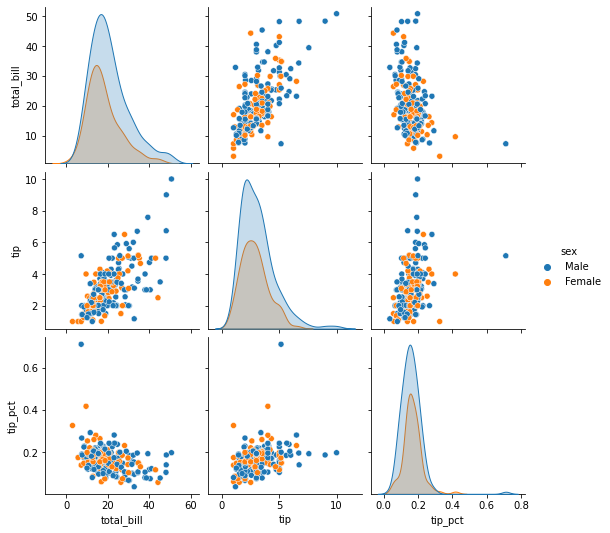

In [48]:
sns.pairplot(data=tips, hue='sex')